In [3]:
# Tim sort is a hybrid sorting algorithm derived from merge sort and insertion sort
# GitHub Copilot created these implementations

#implementing merge sort
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        left_half = arr[:mid]
        right_half = arr[mid:]

        merge_sort(left_half)
        merge_sort(right_half)

        i = j = k = 0

        while i < len(left_half) and j < len(right_half):
            if left_half[i] < right_half[j]:
                arr[k] = left_half[i]
                i += 1
            else:
                arr[k] = right_half[j]
                j += 1
            k += 1

        while i < len(left_half):
            arr[k] = left_half[i]
            i += 1
            k += 1

        while j < len(right_half):
            arr[k] = right_half[j]
            j += 1
            k += 1
    return arr

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

    
# hybrid/Tim Sort algo
def hybrid_sort(arr, k):
    if len(arr) <= k:
        return insertion_sort(arr)
    mid = len(arr) // 2
    left = hybrid_sort(arr[:mid], k)
    right = hybrid_sort(arr[mid:], k)
    return merge(left, right)

def merge(left, right):
    sorted_arr = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_arr.append(left[i])
            i += 1
        else:
            sorted_arr.append(right[j])
            j += 1
    sorted_arr.extend(left[i:])
    sorted_arr.extend(right[j:])
    return sorted_arr

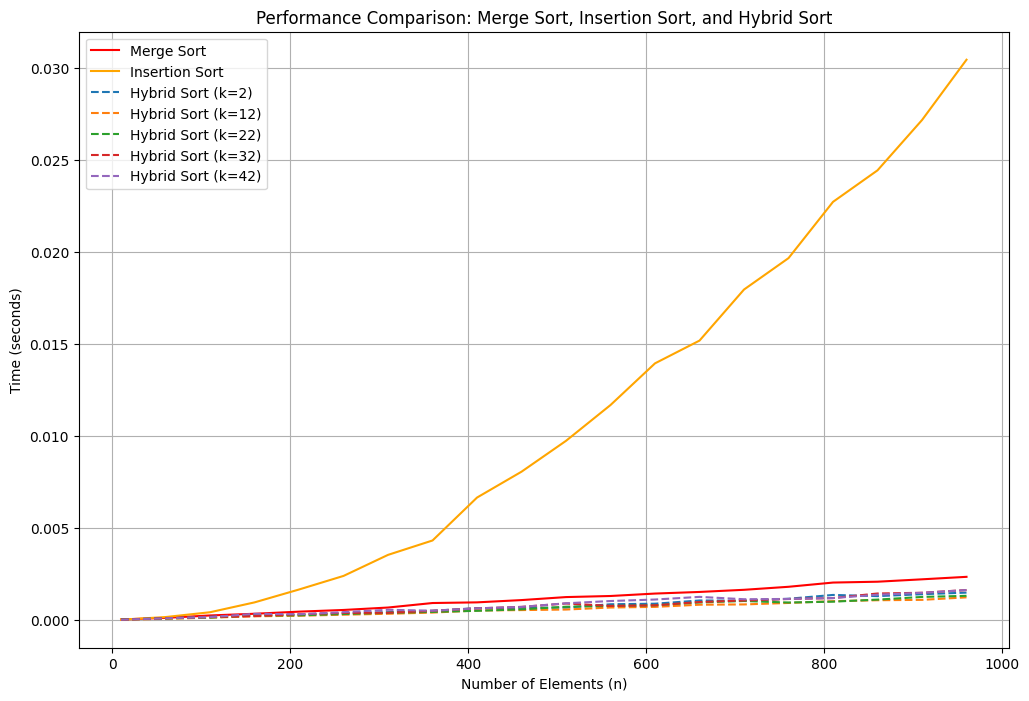

In [7]:
# Compare implementations of Merge sort and Insertion sort, testing each over a range of values for n. Provide a graph of the results, clearly indicating the value on n where the lines cross (or a range of values where they essentially overlap).


import time
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)  
n_values = np.arange(10, 1000, 50)  
k_values = range(2, 51, 10)  
insertion_sort_times = []
merge_sort_times=[]
hybrid_sort_times = {k: [] for k in k_values}



for n in n_values:
    np.random.seed(n)
    test_data = np.random.randint(0, 10000, n)
    
    start_time = time.time()
    merge_sort(test_data.copy())
    merge_sort_times.append(time.time() - start_time)
    
    start_time = time.time()
    insertion_sort(test_data.copy())
    insertion_sort_times.append(time.time() - start_time)
    
    for k in k_values:
        start_time = time.time()
        hybrid_sort(test_data.copy(), k)
        hybrid_sort_times[k].append(time.time() - start_time)

plt.figure(figsize=(12, 8))
plt.plot(n_values, merge_sort_times, label='Merge Sort', color='red')
plt.plot(n_values, insertion_sort_times, label='Insertion Sort', color='orange')

for k in k_values:
    plt.plot(n_values, hybrid_sort_times[k], label=f'Hybrid Sort (k={k})', linestyle='--')

plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.title('Performance Comparison: Merge Sort, Insertion Sort, and Hybrid Sort')
plt.legend()
plt.grid(True)
plt.show()


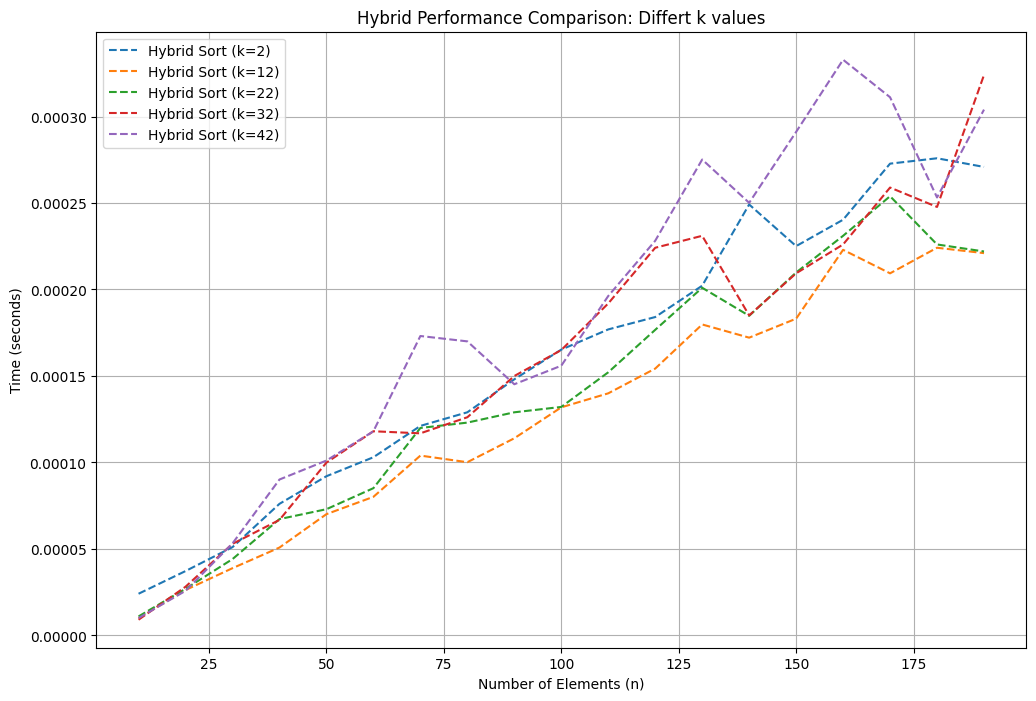

In [18]:
# Compare implementations of Merge sort and Insertion sort, testing each over a range of values for n. Provide a graph of the results, clearly indicating the value on n where the lines cross (or a range of values where they essentially overlap).
# GPT used for help in plotting

np.random.seed(1)  
n_values = np.arange(10, 200, 10)
k_values = range(2, 51, 10)  
insertion_sort_times = []
merge_sort_times=[]
hybrid_sort_times = {k: [] for k in k_values}



for n in n_values:
    np.random.seed(n)
    test_data = np.random.randint(0, 10000, n)
    
    start_time = time.time()
    merge_sort(test_data.copy())
    merge_sort_times.append(time.time() - start_time)
    
    start_time = time.time()
    insertion_sort(test_data.copy())
    insertion_sort_times.append(time.time() - start_time)
    
    for k in k_values:
        start_time = time.time()
        hybrid_sort(test_data.copy(), k)
        hybrid_sort_times[k].append(time.time() - start_time)

plt.figure(figsize=(12, 8))
# plt.plot(n_values, merge_sort_times, label='Merge Sort', color='red')
# plt.plot(n_values, insertion_sort_times, label='Insertion Sort', color='orange')

for k in k_values:
    plt.plot(n_values, hybrid_sort_times[k], label=f'Hybrid Sort (k={k})', linestyle='--')

plt.xlabel('Number of Elements (n)')
plt.ylabel('Time (seconds)')
plt.title('Hybrid Performance Comparison: Differt k values')
plt.legend()
plt.grid(True)

plt.legend()
plt.show()
